## Import relevant packages

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Import csv data files

In [86]:
df = pd.read_csv("politifact_data.csv")
df.shape

(25923, 11)

In [87]:
df1 = pd.read_csv("politifact_with_bio_data.csv")
df1.shape

(7645, 25)

Creation of label variable

In [88]:
true = ['mostly-true', 'true']
false = ['barely-true', 'false', 'half-true', 'pants-fire']
df['accuracy'] = df['accuracy_rating'].apply(lambda x: 0 if x in false else 1)
df1['accuracy'] = df1['accuracy_rating'].apply(lambda x: 0 if x in false else 1)

In [89]:
df.shape

(25923, 12)

<b> There are 12 columns and 25923 rows of data in the dataset. </b>

## Analysis of data without bio data

This analysis only concerns about the claim data.

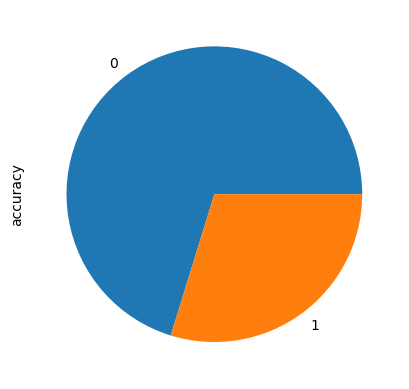

0    18207
1     7716
Name: accuracy, dtype: int64


In [90]:
df['accuracy'].value_counts().plot(kind='pie')
plt.show()
print(df['accuracy'].value_counts())

There are 18207 mostly false data points and 7716 mostly true data points in df.

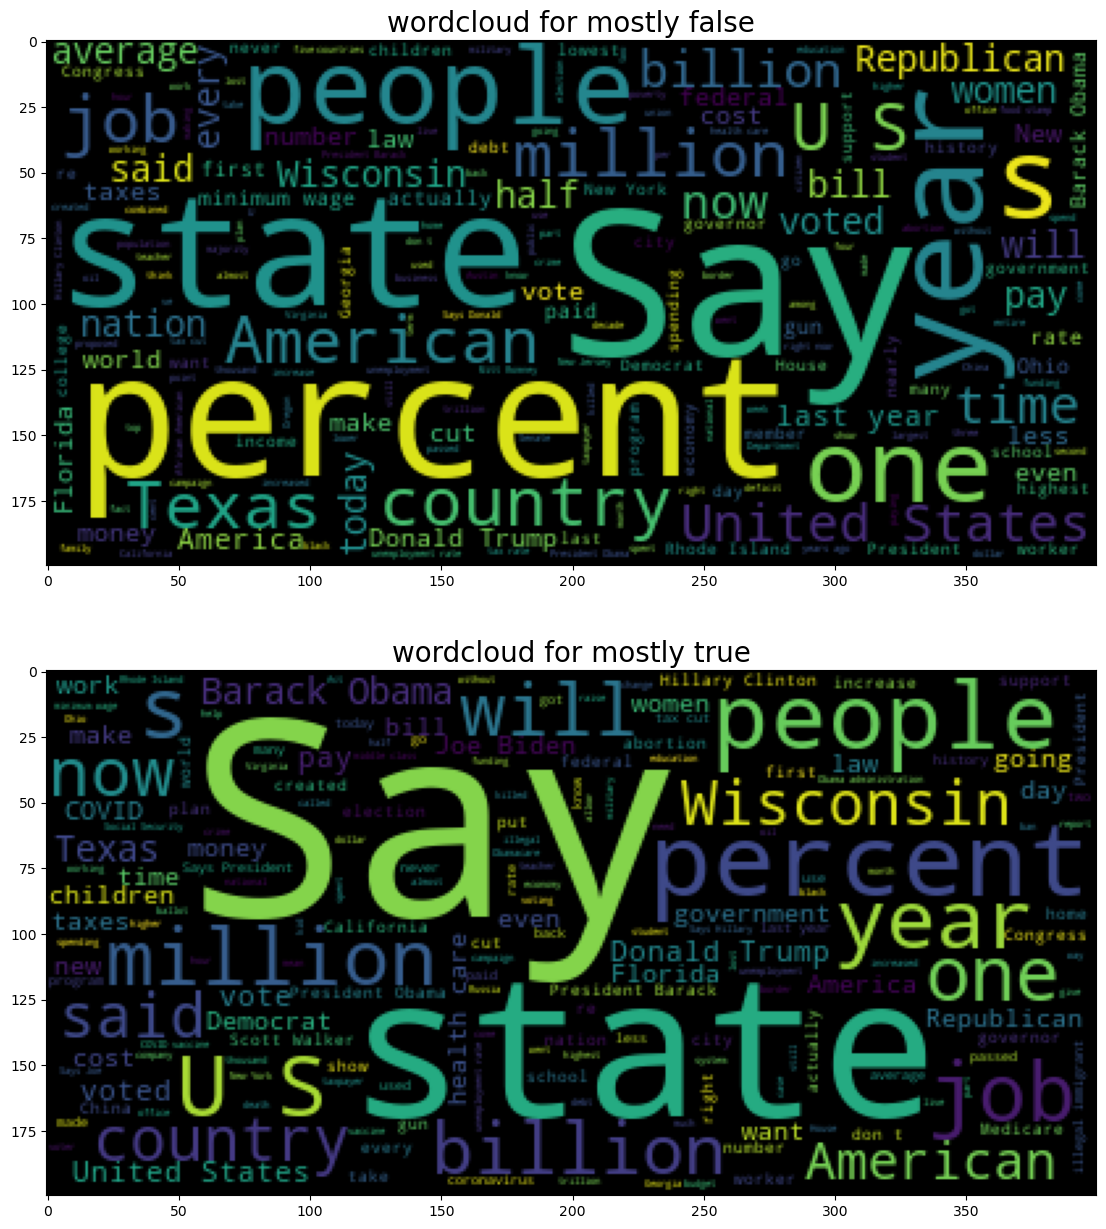

In [91]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig, axes = plt.subplots(2,1,figsize=(20,15))
wc_false = WordCloud(stopwords=STOPWORDS).generate(" ".join(df[df['accuracy']==1]['claim'].values))
wc_true = WordCloud(stopwords=STOPWORDS).generate(" ".join(df[df['accuracy']==0]['claim'].values))
axes[0].imshow(wc_false)
axes[0].set_title("wordcloud for mostly false",{'size': 20})
axes[1].imshow(wc_true)
axes[1].set_title("wordcloud for mostly true",{'size': 20})
plt.show()

## Analysis of data with bio data

In [92]:
df1.drop(columns=['name.middle','name.last','name.first'],inplace=True)
df1.isna().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
name                         0
claim_date                   0
claim_source                39
claim                        0
issue                        0
accuracy_rating              0
fact_checker                 4
fact_check_ruling_date       0
url                          0
page_num                     0
id.bioguide               1182
id.wikipedia                 0
bio.gender                   0
bio.birthday                29
type                         0
party                        3
start                        0
end                          0
state                     1182
full_name                    0
accuracy                     0
dtype: int64

Impute data fields with NA values.

Impute claim_source, party and state with missing values. Forward fill bio.birthday.

In [93]:
df1['claim_source'] = df1['claim_source'].fillna("missing_value")
df1['party'] = df1['party'].fillna("missing_party")
df1['state'] = df1['state'].fillna("missing_state")
df1['bio.birthday'] = df1['bio.birthday'].fillna(method='ffill')

In [94]:
df1.isna().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
name                         0
claim_date                   0
claim_source                 0
claim                        0
issue                        0
accuracy_rating              0
fact_checker                 4
fact_check_ruling_date       0
url                          0
page_num                     0
id.bioguide               1182
id.wikipedia                 0
bio.gender                   0
bio.birthday                 0
type                         0
party                        0
start                        0
end                          0
state                        0
full_name                    0
accuracy                     0
dtype: int64

In [95]:
df1.reset_index(inplace=True)

In [96]:
df1.shape

(7645, 24)

There are 22 columns with 7645 rows of data.

In [98]:
df1['accuracy_rating'].unique()

array(['mostly-true', 'half-true', 'true', 'barely-true', 'false',
       'pants-fire'], dtype=object)

Plots on the different features for df1 (with bio data)

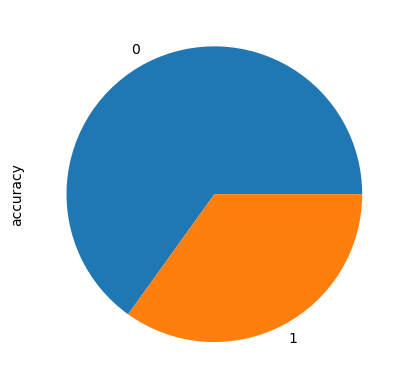

0    4976
1    2669
Name: accuracy, dtype: int64


In [99]:
df1['accuracy'].value_counts().plot(kind='pie')
plt.show()
print(df1['accuracy'].value_counts())

There are 3929 mostly false data points and 2467 mostly true data points in df1.

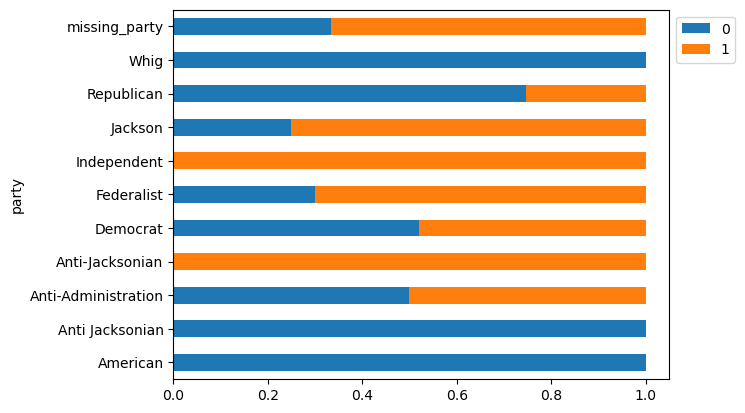

In [100]:
df1.groupby(by=['party'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

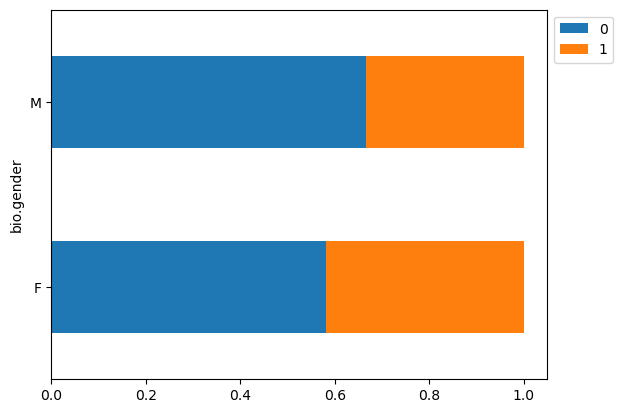

In [101]:
df1.groupby(by=['bio.gender'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

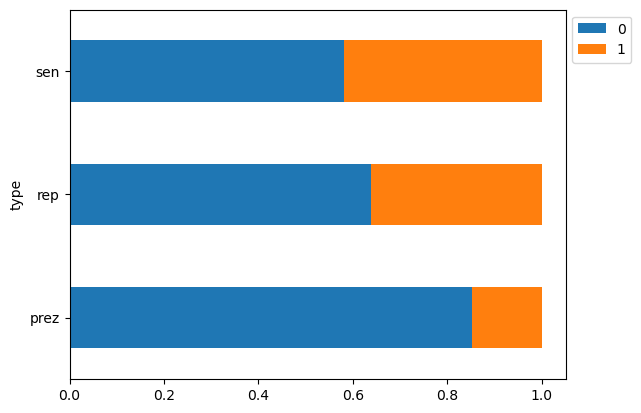

In [102]:
df1.groupby(by=['type'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [103]:
num_unique_issues = df1['issue'].nunique()
print(f'There are {num_unique_issues} unique issues.')

There are 85 unique issues.


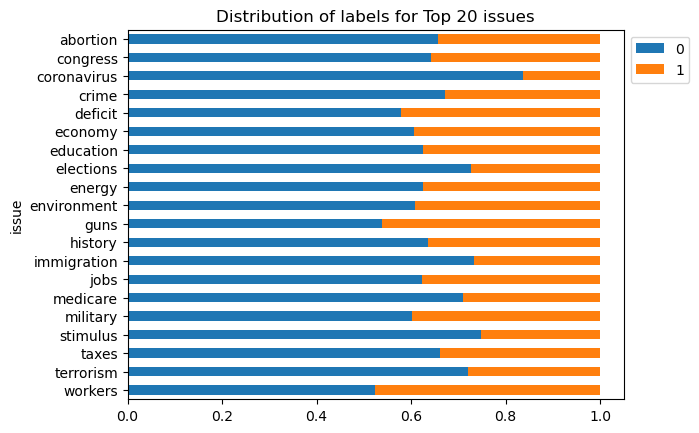

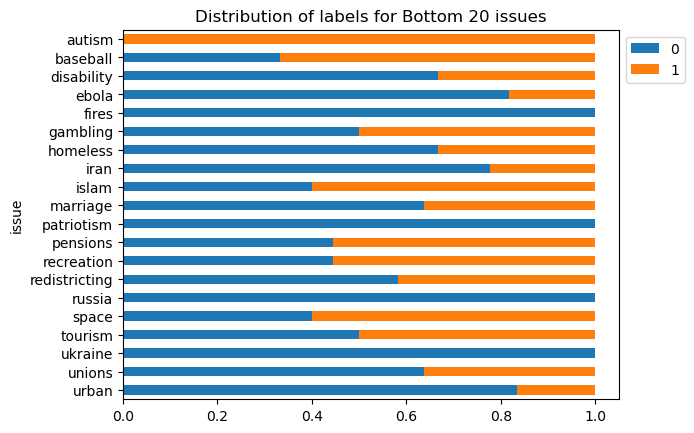

In [104]:
top_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).head(20).index.sort_values()

# find bottom 20 issues based on freq counts
bottom_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).tail(20).index.sort_values()
temp = df1[df1['issue'].isin(top_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Top 20 issues')

temp = df1[df1['issue'].isin(bottom_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Bottom 20 issues')
plt.show()

Output dataframe as CSV files

In [105]:
df1.to_csv("politifact_with_bio_data_cleaned.csv")

In [106]:
df.to_csv("politifact_data_labels.csv")